In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
import yfinance as yf
import math


In [2]:
start_date = pd.to_datetime('01-01-1989')
end_date = pd.to_datetime('01-01-2025')


In [3]:
#Load Gold Dataframe
df_gold = pd.read_csv('xauusd_d.csv', usecols=[0,4])
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold.set_index('Date',inplace=True)
df_gold = df_gold.resample('M').last()
df_gold['Monthly Return'] = df_gold['Close'].pct_change()
df_gold=df_gold[df_gold.index.date >= start_date.date()].copy()
df_gold['Cumul Monthly Returns']=(1+df_gold['Monthly Return']).cumprod()
df_gold

,Close,Monthly Return,Cumul Monthly Returns
Date,,,
1989-01-31,395.800,-0.040019,0.959981
1989-02-28,390.400,-0.013643,0.946883
1989-03-31,390.000,-0.001025,0.945913
1989-04-30,380.500,-0.024359,0.922872
1989-05-31,366.500,-0.036794,0.888916
...,...,...,...
2024-09-30,2634.735,0.052824,6.390335
2024-10-31,2746.205,0.042308,6.660696
2024-11-30,2650.455,-0.034866,6.428462


In [4]:
def monthly_return_based_on_yield(yield_p_month,yield_month,maturity):
     Total_Return = yield_p_month/12 + (yield_p_month/yield_month)*(1-1/((1+yield_month/2)**(2*(maturity-1/12))))+1/((1+yield_month/2)**(2*(maturity-1/12)))-1
     return Total_Return

#Formule provenant de : 
#https://doi.org/10.25397/eur.8152748
#https://doi.org/10.3390/data4030091


In [5]:
#Load Short Term Bond 3 Months Dataframe

df_3m = pd.read_csv('3musy_b_d.csv')
df_3m['Date'] = pd.to_datetime(df_3m['Date'])
df_3m.set_index('Date',inplace=True)
df_3m = df_3m.drop(df_3m[df_3m['Close']=='.'].index)
df_3m['Close'] = df_3m['Close'].astype(float)
df_3m = df_3m.drop(df_3m[df_3m['Close']==0.0].index)


#Resample Monthly
df_3m = df_3m.resample(rule="M").first().ffill()[['Close']]
df_3m['PValue']=df_3m['Close'].shift(1)
df_3m = df_3m[1:].copy()

# Calculate Montly Return
df_3m['Monthly Return'] = df_3m.apply(lambda x: monthly_return_based_on_yield(x['PValue']/100,x['Close']/100, 0.25), axis=1)
df_3m[df_3m.index.date >= start_date.date()]
df_3m['Cumul Monthly Returns']=(1+df_3m['Monthly Return']).cumprod()
df_3m.ffill(inplace=True)
df_3m



,Close,PValue,Monthly Return,Cumul Monthly Returns
Date,,,,
1991-02-28,6.158,6.241,0.005336,1.005336
1991-03-31,6.295,6.158,0.004908,1.010271
1991-04-30,5.977,6.295,0.005766,1.016095
1991-05-31,5.702,5.977,0.005431,1.021613
1991-06-30,5.746,5.702,0.004680,1.026394
...,...,...,...,...
2024-09-30,5.111,5.253,0.004610,2.372571
2024-10-31,4.594,5.111,0.005108,2.384690
2024-11-30,4.514,4.594,0.003960,2.394132


In [6]:
#Load Long Term Bond 10 Years Dataframe

df_10y = pd.read_csv('10yusy_b_d.csv')
df_10y['Date'] = pd.to_datetime(df_10y['Date'])
df_10y.set_index('Date',inplace=True)
df_10y = df_10y.drop(df_10y[df_10y['Close']=='.'].index)
df_10y['Close'] = df_10y['Close'].astype(float)
df_10y = df_10y.drop(df_10y[df_10y['Close']==0.0].index)


#Resample Monthly
df_10y = df_10y.resample(rule="M").first().ffill()[['Close']]
df_10y['PValue']=df_10y['Close'].shift(1)
df_10y = df_10y[1:].copy()

# Calculate Montly Return
df_10y['Monthly Return'] = df_10y.apply(lambda x: monthly_return_based_on_yield(x['PValue']/100,x['Close']/100, 10), axis=1)
df_10y[df_10y.index.date >= start_date.date()]
df_10y['Cumul Monthly Returns']=(1+df_10y['Monthly Return']).cumprod()
df_10y.ffill(inplace=True)
df_10y



,Close,PValue,Monthly Return,Cumul Monthly Returns
Date,,,,
1871-02-28,5.320,5.320,0.004433,1.004433
1871-03-31,5.330,5.320,0.003671,1.008120
1871-04-30,5.330,5.330,0.004442,1.012598
1871-05-31,5.330,5.330,0.004442,1.017096
1871-06-30,5.340,5.330,0.003679,1.020838
...,...,...,...,...
2024-09-30,3.929,3.978,0.007307,1001.923330
2024-10-31,3.733,3.929,0.019395,1021.355612
2024-11-30,4.386,3.733,-0.048946,971.364316


In [7]:
#Load Equities Dataframe
TRspx = yf.download("^SP500TR",start=start_date)

TRspx = TRspx.resample('M').last()
TRspx['Monthly Return'] = TRspx['Close'].pct_change()
TRspx=TRspx[TRspx.index.date >= start_date.date()].copy()
TRspx['Cumul Monthly Returns']=(1+TRspx['Monthly Return']).cumprod()
TRspx

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Monthly Return,Cumul Monthly Returns
Date,,,,,,,,
1989-01-31,309.209991,309.209991,309.209991,309.209991,309.209991,0,NaN,NaN
1989-02-28,301.510010,301.510010,301.510010,301.510010,301.510010,0,-0.024902,0.975098
1989-03-31,308.540009,308.540009,308.540009,308.540009,308.540009,0,0.023316,0.997833
1989-04-30,324.559998,324.559998,324.559998,324.559998,324.559998,0,0.051922,1.049643
1989-05-31,337.690002,337.690002,337.690002,337.690002,337.690002,0,0.040455,1.092106
...,...,...,...,...,...,...,...,...
2024-09-30,12529.389648,12613.730469,12480.030273,12608.070312,12608.070312,0,0.021357,40.775106
2024-10-31,12646.780273,12646.780273,12493.280273,12493.740234,12493.740234,0,-0.009068,40.405357
2024-11-30,13164.870117,13252.589844,13164.870117,13227.129883,13227.129883,0,0.058701,42.777175


In [8]:
Portfolio = pd.DataFrame()
Portfolio.index = df_gold.index[:-1]
Portfolio['Return Gold'] = df_gold['Monthly Return'] 
Portfolio['Return 10Y'] = df_10y['Monthly Return'] 
Portfolio['Return 3M'] = df_3m['Monthly Return'] 
Portfolio['Return Equities'] = TRspx['Monthly Return'] 


#Permantent Portfolio
Portfolio['Permanent Porfolio Return'] = (Portfolio['Return Gold']  + Portfolio['Return 10Y'] + Portfolio['Return 3M'] + Portfolio['Return Equities']) / 4 #25% in each asset
Portfolio['Permanent Porfolio Cumul Return'] = (1+Portfolio['Permanent Porfolio Return']).cumprod()


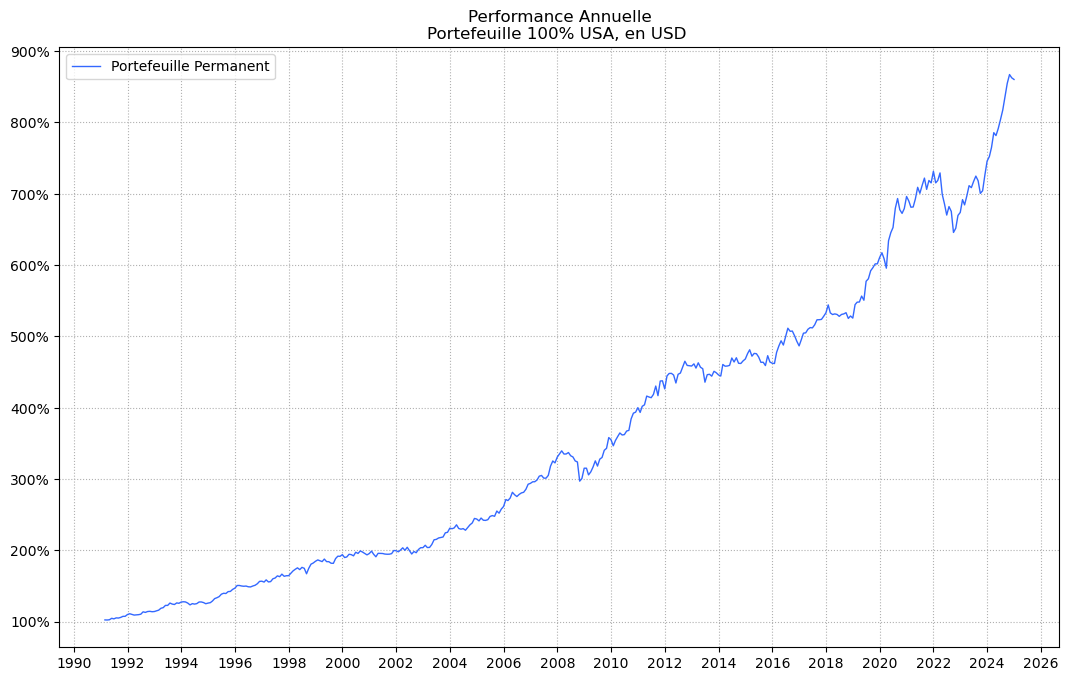

In [9]:
fig = plt.figure(figsize = (10, 6),dpi=100)

ax=fig.add_axes([0,0,1,1])

labels = Portfolio.index.values
data1 = Portfolio['Permanent Porfolio Cumul Return'].values

alpha = 1

ax.plot(
    labels,
    data1,
    color="#3368ff",
    # marker=".", 
    # markersize=20,
    alpha = alpha,
    linewidth=1,
    label="Portefeuille Permanent")

ax.set_title(f"Performance Annuelle\nPortefeuille 100% USA, en USD ")
ax.grid(True, linestyle =':')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=2))


# Compute the portfolio CAGR
months=len(Portfolio)
cagr = Portfolio.iloc[-1]['Permanent Porfolio Cumul Return']**(12/months)-1

plt.legend()




plt.show()



In [10]:
risk_free_rate = 0.00/252

# Compute the permanent portfolio Sharpe ratio
mean_return = Portfolio['Permanent Porfolio Return'].mean()
std_return = Portfolio['Permanent Porfolio Return'].std()
sharpe= np.sqrt(12)*(mean_return-risk_free_rate)/std_return

# Compute the SP500 Sharpe ratio
mean_return_sp = Portfolio['Return Equities'].mean()
std_return_sp = Portfolio['Return Equities'].std()
sharpe_sp= np.sqrt(12)*(mean_return_sp-risk_free_rate)/std_return_sp

# Print the Sharpe ratio
print(f"Sharpe Ratio Permanent Portfolio: {sharpe:.2f}")
print(f"Sharpe Ratio SP500: {sharpe_sp:.2f}")

Sharpe Ratio Permanent Portfolio: 1.12
Sharpe Ratio SP500: 0.78


In [11]:
Portfolio = Portfolio[Portfolio.index<=end_date].copy()

In [12]:
def max_drawdown(cumul_returns):

    cumul_peaks = np.maximum.accumulate(cumul_returns.dropna())
    cumul_peaks[cumul_peaks<1]=1
    drawdown = (cumul_returns-cumul_peaks)/cumul_peaks

    return(drawdown.min(),drawdown)

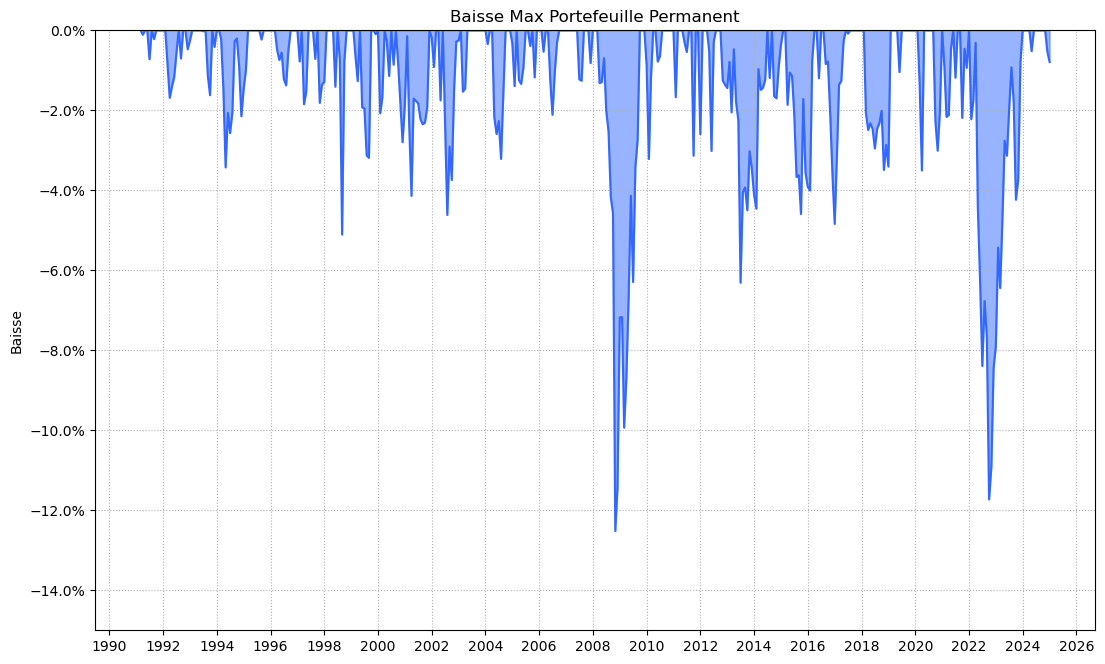

In [13]:
fig = plt.figure(figsize = (10, 6),dpi=100)

ax=fig.add_axes([0,0,1,1])

mdd, drawdown = max_drawdown(Portfolio['Permanent Porfolio Cumul Return'])

ax.plot(drawdown,color='#3368ff')
ax.set_title('Baisse Max Portefeuille Permanent')
ax.set_ylabel('Baisse')
ax.set_ylim(-0.15,0)
ax.grid(True, linestyle =':')

ax.fill_between(Portfolio.index, drawdown, alpha=0.5, color='#3368ff')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=2))



plt.show()



In [14]:
Returns_DF = pd.DataFrame()
Returns_DF.index = Portfolio.tail(372).index


In [15]:
for starting_month in Returns_DF.index:
    total_returns = (1+Portfolio[Portfolio.index>=starting_month]["Permanent Porfolio Return"]).prod()
    Returns_DF.loc[starting_month,"Total Return"]=total_returns
    Returns_DF.loc[starting_month,"CAGR"]=total_returns**(12/len(Portfolio[Portfolio.index>=starting_month]))
    
Returns_DF

,Total Return,CAGR
Date,,
1994-01-31,6.757383,1.063572
1994-02-28,6.736985,1.063645
1994-03-31,6.751730,1.063898
1994-04-30,6.838850,1.064520
1994-05-31,6.976171,1.065392
...,...,...
2024-08-31,1.052423,1.130464
2024-09-30,1.028038,1.086494
2024-10-31,1.006376,1.025749


In [16]:
Returns_DF_y = pd.DataFrame()

Returns_DF_y['Max CAGR'] = Returns_DF.resample(rule="Y").max()['CAGR']
Returns_DF_y['Min CAGR'] = Returns_DF.resample(rule="Y").min()['CAGR']

Returns_DF_y['Ecart CAGR'] = Returns_DF_y['Max CAGR']-Returns_DF_y['Min CAGR']
Returns_DF_y['Durée investissement'] = ((Returns_DF_y.index[-1]-Returns_DF_y.index)/np.timedelta64(1, 'Y')).astype(int)+1


Returns_DF_y


,Max CAGR,Min CAGR,Ecart CAGR,Durée investissement
Date,,,,
1994-12-31,1.066235,1.063572,0.002662,31
1995-12-31,1.066196,1.063127,0.003069,30
1996-12-31,1.063773,1.062139,0.001634,29
1997-12-31,1.063663,1.062133,0.001529,28
1998-12-31,1.064241,1.061353,0.002888,27
1999-12-31,1.063323,1.060791,0.002532,26
2000-12-31,1.063920,1.061438,0.002482,25
2001-12-31,1.066121,1.063181,0.002939,24
2002-12-31,1.068623,1.065446,0.003177,23


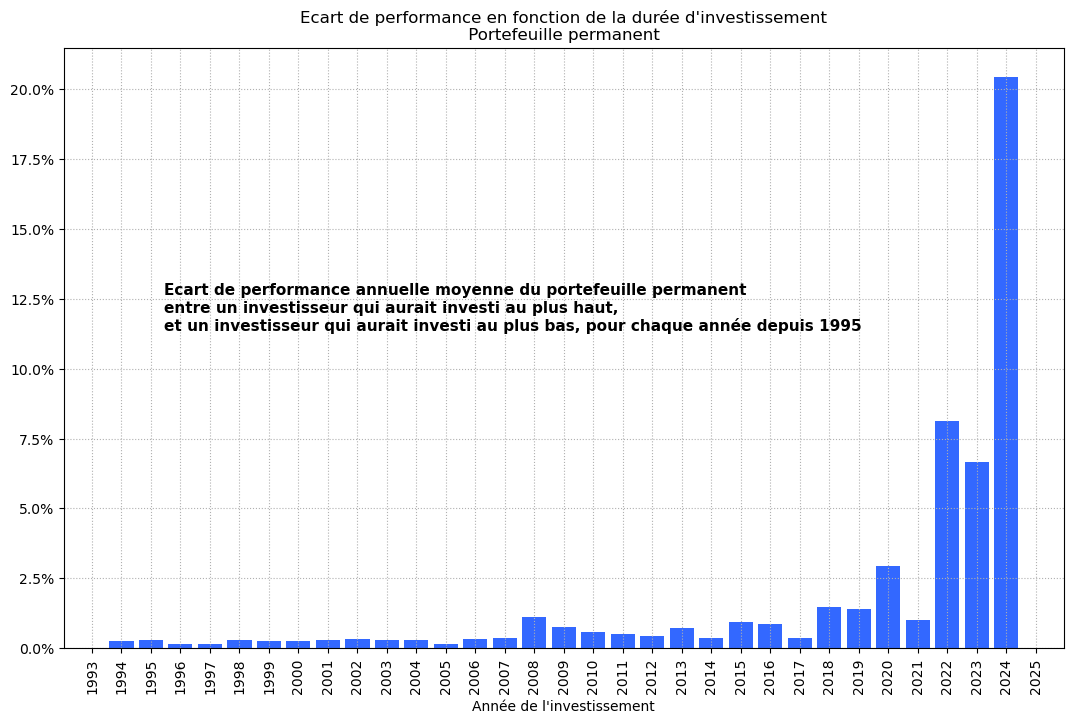

In [17]:
fig = plt.figure(figsize = (10, 6),dpi=100)

ax=fig.add_axes([0,0,1,1])

labels = Returns_DF_y.index.shift(-1)
data1 = Returns_DF_y['Ecart CAGR']
width = 300  

alpha = 1

ax.bar(
    labels,
    data1,
    color="#3368ff",
    width=width,
    # marker=".", 
    # markersize=20,
    alpha = alpha)

ax.set_title(f"Ecart de performance en fonction de la durée d'investissement\n Portefeuille permanent ")
ax.grid(True, linestyle =':')
ax.yaxis.set_ticks(np.arange(0,0.225,0.025))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

ax.tick_params("x", rotation=90) 
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
ax.set_xlabel("Année de l'investissement")


plt.figtext(0.1, 0.5, f"Ecart de performance annuelle moyenne du portefeuille permanent \nentre un investisseur qui aurait investi au plus haut, \net un investisseur qui aurait investi au plus bas, pour chaque année depuis 1995 \n", ha="left",fontsize=11,weight="bold",bbox ={'facecolor':'grey','alpha':0, 'pad':5}) 


plt.show()



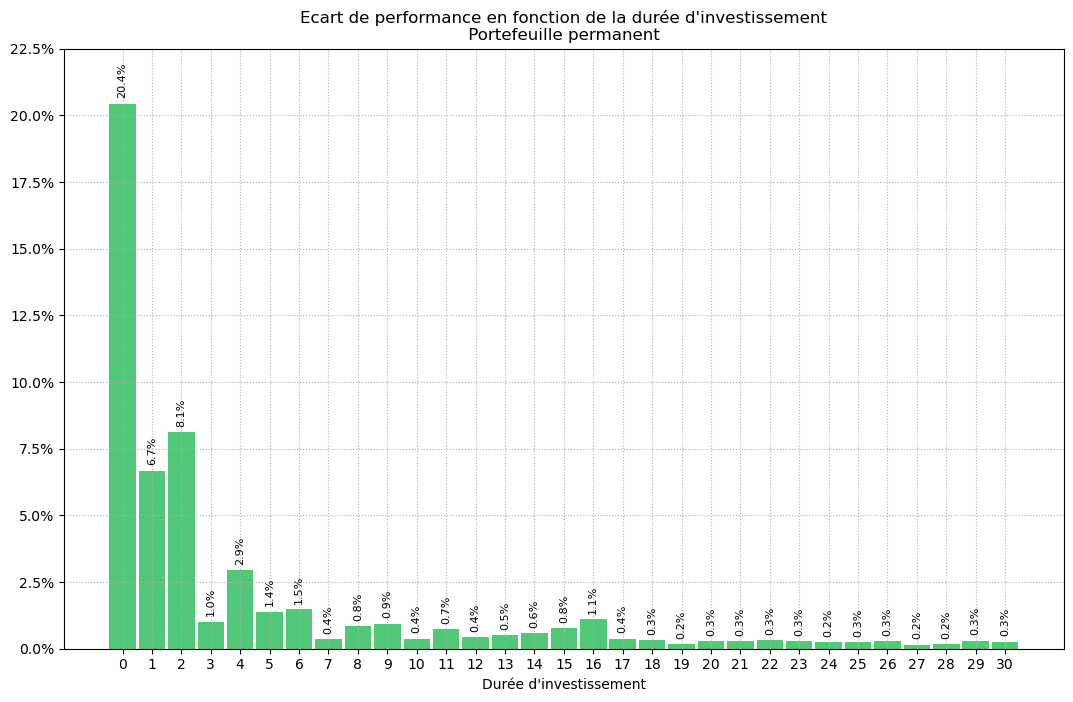

In [22]:
fig = plt.figure(figsize = (10, 6),dpi=100)

ax=fig.add_axes([0,0,1,1])

labels = Returns_DF_y['Durée investissement']-1
data1 = Returns_DF_y['Ecart CAGR']
width = 0.9  

alpha = 1

bars=ax.bar(
    labels,
    data1,
    color="#50C878",
    width=width,
    # marker=".", 
    # markersize=20,
    alpha = alpha)

ax.set_title(f"Ecart de performance en fonction de la durée d'investissement\n Portefeuille permanent ")
ax.grid(True, linestyle =':')
ax.yaxis.set_ticks(np.arange(0,0.25,0.025))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))


ax.xaxis.set_ticks(np.arange(0,31))
ax.set_xlabel("Durée d'investissement")

# plt.figtext(0.2, 0.5, f"Ecart de performance annuelle moyenne du portefeuille permanent \nentre un investisseur qui aurait investi au plus haut, \net un investisseur qui aurait investi au plus bas \n", ha="left",fontsize=11,weight="bold",bbox ={'facecolor':'grey','alpha':0, 'pad':5}) 

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, 0.002+height, f'{height:.1%}', ha='center', va='bottom',size=8,rotation=90)


plt.show()



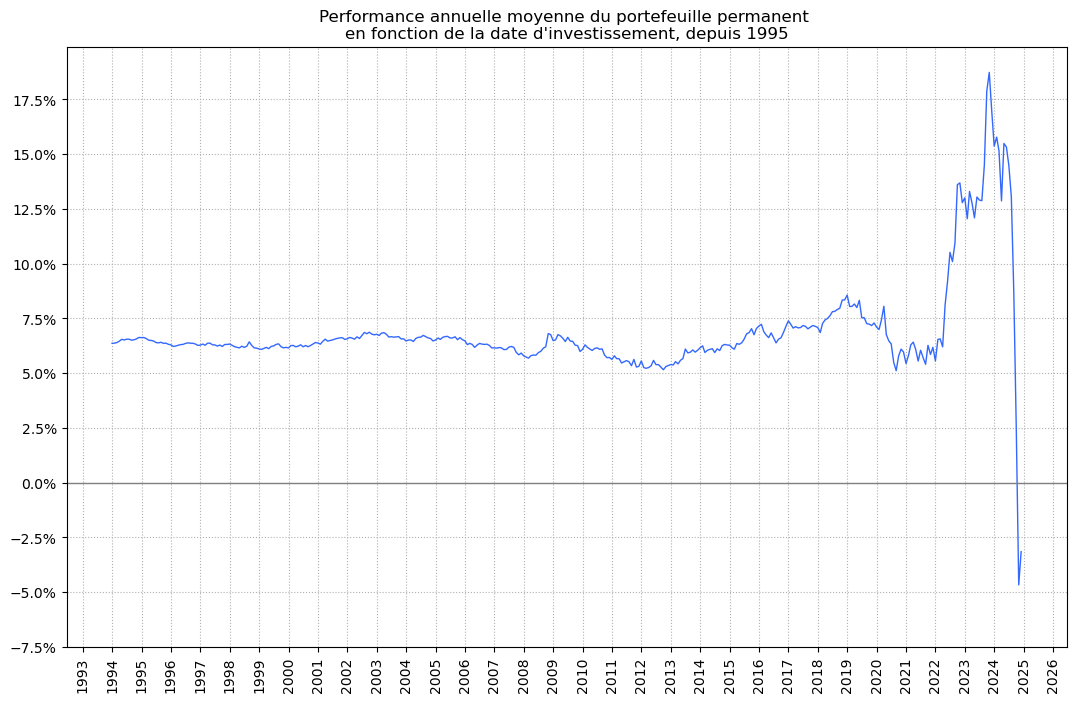

In [19]:
fig = plt.figure(figsize = (10, 6),dpi=100)

ax=fig.add_axes([0,0,1,1])

labels = Returns_DF.index.shift(-1).values
data1 = Returns_DF['CAGR'].values-1

alpha = 1

ax.plot(
    labels,
    data1,
    color="#3368ff",
    # marker=".", 
    # markersize=20,
    alpha = alpha,
    linewidth=1)

ax.axhline(y=0,color="grey",linewidth=1)

ax.set_title(f"Performance annuelle moyenne du portefeuille permanent \nen fonction de la date d'investissement, depuis 1995")
ax.grid(True, linestyle =':')
ax.yaxis.set_ticks(np.arange(-0.075,0.2,0.025))
ax.tick_params("x", rotation=90) 

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))

plt.show()

